# Lista 10 - Fundamentos Estatísticos para Ciência dos Dados A
- Aluno: Thiago Martin Poppe
- Matrícula: 2017014324

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

# Exercícios do capítulo 09

## Questão 03)

- Suponha que $c(1|2) = c(2|1)$ e que $\pi_1 = \pi_2$. Neste caso, a regra ótima fica reduzida a uma simples comparação. Qual é esta regra de classificação?

**Resposta:** A regra ótima será da forma $f_1(\mathbf{x}) > f_2(\mathbf{x})$.

- Imagine agora que $\pi_1 = 0.01$ e que $c(1|2) = c(2|1)$. Quantas vezes maior $f_1(\mathbf{x})$ deve ser para que classifiquemos o item com característica $\mathbf{x}$ em 1?

**Resposta:** A regra ótima será da forma $f_1(\mathbf{x}) > 99f_2(\mathbf{x})$, logo $f_1$ deve ser 99 vezes maior.

- Suponha que $c(1|2)$ seja 10 vezes menor que $c(2|1)$. Neste caso, com $\pi_1 = 0.01$, como a regra do item acima fica modificada?

**Resposta:** A regra ótima será da forma $f_1(\mathbf{x}) > 9.9f_2(\mathbf{x})$.

## Questão 04)

Marque V ou F as afirmativas a seguir:
- A precisão mede o quanto os resultados da classificação são úteis: **V**
- A revocação mede o quanto os resultados da aplicação da regra de classificação são completos: **V**
- A soma de precisão e revocação é igual a 1: **F**
- $\text{Precisão} = \text{Revocação} * \frac{\mathbb{P}(\mathbf{X} \in 1)}{\mathbb{P}(D(\mathbf{x}) = 1)}$: **V**
- Existe um trade-off entre precisão e revocação: se aumentarmos uma métrica, a outra tem de diminuir: **F**

## Questão 05)

- Uma regra de decisão que vai errar pouco será atribuir a classe 2 a todo e qualquer item: $D(\mathbf{X}) \equiv 2$ para todo valor de $\mathbf{X}$. Obtenha a probabilidade de classificação errada. A probabilidade é próxima de zero?

**Resposta:** A probabilidade de classificação errada será $\pi_1 \approx 0$.

- Se o custo de má-clasificação for também desbalanceado, com $c(2|1) >> c(1|2)$, a estratégia anterior pode ser muito ruim. Obtenha o custo esperado de má-classificação (ECM) da regra anterior.

**Resposta:**
$$
\begin{align*}
EMC &= \mathbb{E}(\textbf{cost}) \\
&= 0 * \mathbb{P}(\textbf{acertar}) + \textbf{cost}_1 * \mathbb{P}(\textbf{erro}_1) + \textbf{cost}_2 * \mathbb{P}(\textbf{erro}_2) \\
&= c(2|1)\mathbb{P}(\mathbf{X} \in R_2 | \in \pi_1)\mathbb{P}(\pi_1) + c(1|2)\mathbb{P}(\mathbf{X} \in R_1 | \in \pi_2)\mathbb{P}(\pi_2) \\
&= c(2|1)\mathbb{P}(\pi_1)
\end{align*}
$$

Note que dado a estratégia anterior, teremos que $\mathbb{P}(\mathbf{X} \in R_2 | \in \pi_1)=1$ e consequentemente $\mathbb{P}(\mathbf{X} \in R_1 | \in \pi_2) = 0$, já que estaremos sempre classificando qualquer valor como sendo da classe 2.

## Questão 08)

**Resposta:** teremos que esse somatório para $g=2$ será $p_1f_1(x)c(2|\in 1) + p_2f_2(x)c(1 | \in 2)$, que possuí o mesmo formato de $EMC = c(2|1)\mathbb{P}(\mathbf{X} \in R_2 | \in \pi_1)\mathbb{P}(\pi_1) + c(1|2)\mathbb{P}(\mathbf{X} \in R_1 | \in \pi_2)\mathbb{P}(\pi_2)$ visto em sala de aula.

# Exercícios do capítulo 10

## Questão 01)

- Você quer selecionar uma amostra para estimar a porcentagem $\theta$ de pessoas que vai votar num candidato $X$. Imagine que a resposta é uma v.a. $X$ de Bernoulli com valores 1 e 0 (vai e não vai votar, respectivamente) e a probabilidade de sucesso é $\theta$. As respostas de $n$ indivíduos serão $X_1, X_2, \dots, X_n$ e você vai estimar $\theta$ usando $\hat\theta = (X_1 + \dots + X_n)/n$, a proporção amostral. Se você assumir que as respostas são variáveis aleatórias i.i.d., determine o tamanho $n$ da amostra necessário para que o erro de estimação $|\hat\theta - \theta|$ seja menor que 0.02 com probabilidade 0.99. Para isto, assuma que você sabe que seu candidato está estacionado entre 15% e 35% dos eleitores (baseado em outras pesquisas mais antigas). Esta é uma faixa de variação enorme, muito pouco precisa, mas que você está bem seguro de que ela contém a verdadeira proporção de eleitores que votam no candidato em questão.

**Resposta:** Queremos determinar $n$ de forma que $\mathbb{P}(|\hat\theta - \theta| < 0.02) < 0.99$, e para isso iremos utilizar o TCL. Dado que $X \sim \text{Bernoulli}(\theta)$ e que $\mathbb{E}(X_i)=\theta$ e $\mathbb{V}(X_i) = \theta(1 - \theta)$, teremos que:
$$
\begin{align*}
\mathbb{P}(|\hat\theta - \theta| < 0.02) &= \mathbb{P}(|\hat{X}  - \theta| < 0.02) \\
&= \mathbb{P}(-0.02 < \hat{X}  - \theta < 0.02) \\
&\approx \mathbb{P}\left(-\sqrt{n}\frac{0.02}{\sqrt{\theta(1-\theta)}} < N(0,1) < \sqrt{n}\frac{0.02}{\sqrt{\theta(1-\theta)}}\right)
\end{align*}
$$

Com a informação de que para $\mathbb{P}(-\alpha < N(0,1) < \alpha) = 0.99$ teremos que $\alpha = 2.58$, conseguimos descobrir que o valor de $n$, tomando $\theta$ = 0.35 (pior caso), será igual à 3786 (arredondando). Os cálculos podem ser vistos abaixo.

In [2]:
# Verificando o valor de alpha para que P = 0.99
alpha = np.abs(norm(0,1).ppf(0.01/2))
print('Valor de alpha:', np.round(alpha, 2))

Valor de alpha: 2.58


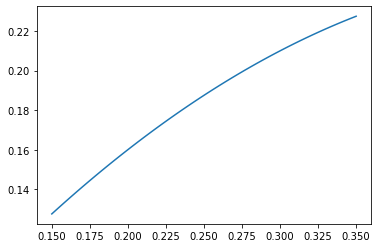

In [3]:
# Plotando a variância para observarmos o comportamento de theta entre (0.15 e 0.35)
# Podemos ver que ela é crescente!
x = np.linspace(0.15, 0.35)
plt.plot(x, x*(1-x))
plt.show()

In [4]:
# Computando o valor de n
n = ((2.58 * (np.sqrt(0.35*(1-0.35)))) / 0.02)**2
print('Valor de n =', np.round(n))

Valor de n = 3786.0


## Questão 02)

- No problema acima, usando uma amostra de tamanho $n = 500$, determine um intervalo da forma $I = (\hat\theta − c, \hat\theta + c)$ tal que a probabilidade $\mathbb{P}(\hat\theta − c \leq \theta \leq \hat\theta + c)$ seja aproximadamente igual ou maior que 0.95.

**Resposta:** Usaremos novamente o TCL, fazendo os mesmos cálculos acima, porém dessa vez teremos $c$ ao invés do valor 0.02. Note que dessa vez, para que $\mathbb{P}(-\alpha < N(0,1) < \alpha) = 0.95$ teremos que $\alpha = 1.96$. Novamente pegaremos $\theta = 0.35$ (pior caso), obtendo assim que $c \approx 0.04181$.

In [5]:
# Verificando o valor de alpha para que P = 0.95
alpha = np.abs(norm(0,1).ppf(0.05/2))
print('Valor de alpha:', np.round(alpha, 2))

Valor de alpha: 1.96


In [6]:
# Computando o valor de c
c = ((1.96 * (np.sqrt(0.35*(1-0.35)))) / np.sqrt(500))
print('Valor de c =', np.round(c, 5))

Valor de c = 0.04181
